In [110]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [67]:
data = pd.read_excel('data/ban.xlsx')

In [68]:
data = data.drop(['№','Банк'], axis=1)
data

Город   Активы  Собственный капитал  Средства физлиц  \
0       Москва   122109                20440            35443   
1       Казань   110741                24410            34918   
2       Москва     1114                  356              274   
3    Лыткарино    18774                 2332            12047   
4      Саратов     7917                 1157             3564   
..         ...      ...                  ...              ...   
366     Москва     7117                 4164                0   
367  Краснодар    12504                 1431             7407   
368  Краснодар     5024                 2117                0   
369     Москва  1315550               197369           267400   
370  Ярославль     2820                  362             1307   

     Кредиты НБС-нетто  Кредиты физлицам  
0                32728              3319  
1                13613              4924  
2                  351               206  
3                 6484               903  
4                 1909               492  
..                 ...               ...  
366                 43                 0  
367               6637              2238  
368               2585               235  
369             665780            170748  
370               1732               221  

[371 rows x 6 columns]

In [69]:
#Кодирование метки
data["Город"].value_counts()
data["Город"] = data["Город"].astype('category')
data.dtypes
data["Город"] = data["Город"].cat.codes
data.head()

Город  Активы  Собственный капитал  Средства физлиц  Кредиты НБС-нетто  \
0     41  122109                20440            35443              32728   
1     26  110741                24410            34918              13613   
2     41    1114                  356              274                351   
3     37   18774                 2332            12047               6484   
4     62    7917                 1157             3564               1909   

   Кредиты физлицам  
0              3319  
1              4924  
2               206  
3               903  
4               492

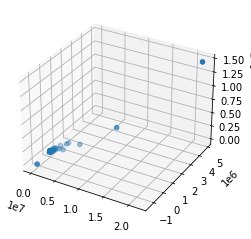

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Кредиты НБС-нетто"], data["Собственный капитал"], data["Средства физлиц"])

In [54]:
#Стандартизация
scaler = StandardScaler()
scaler.fit(data.drop('Город', axis=1))
scaled_features = scaler.transform(data.drop('Город', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('Город', axis=1).columns)


In [73]:
X = []
d = []
for i in range(0,len(scaled_data['Активы'])):
    d.append(scaled_data['Активы'][i])
    d.append(scaled_data['Собственный капитал'][i])
    d.append(scaled_data['Средства физлиц'][i])
    d.append(scaled_data['Кредиты НБС-нетто'][i])
    d.append(scaled_data['Кредиты физлицам'][i])
    X.append(d)
    d = []
X = np.array(X)

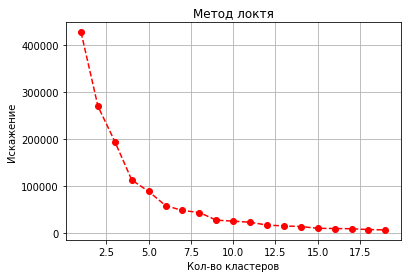

In [95]:
df = data[['Город', 'Активы']]
distortions = []
istortions = []
inertias = []
q1 = {}
q2 = {}
K = range(1, 20)

for k in K:
    #модель
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    q1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    q2[k] = kmeanModel.inertia_
#Визуализация 
plt.plot(K, distortions, 'ro--')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя')
plt.grid(True)
plt.show()

C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


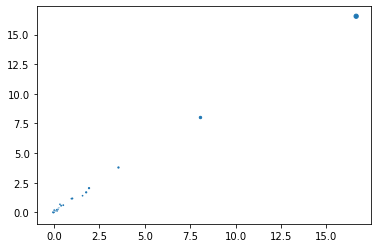

In [109]:
plt.scatter(scaled_data['Кредиты НБС-нетто'],scaled_data['Активы'],scaled_data['Средства физлиц'], label='True Position')

In [102]:
#Обучение модели
kmeans = KMeans(n_clusters=2) 
kmeans.fit(df)

KMeans(n_clusters=2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


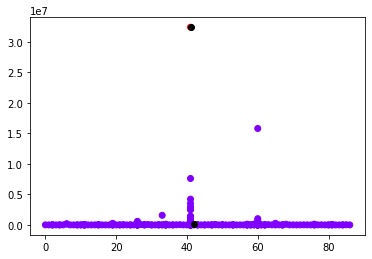

In [103]:
plt.scatter(data['Город'],data['Активы'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print(kmeans.labels_)

In [96]:

range_n_clusters = list (range(2,50))
clast_ = []
score_ = []
df = data
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    clast_.append(n_clusters)
    score_.append(score)
    print("Кол-во кластеров = {}, индекс силуэта {}".format(n_clusters, score))

Кол-во кластеров = 2, индекс силуэта 0.9854855555546174
Кол-во кластеров = 3, индекс силуэта 0.9780684402915117
Кол-во кластеров = 4, индекс силуэта 0.9517201140019955
Кол-во кластеров = 5, индекс силуэта 0.9446905194570542
Кол-во кластеров = 6, индекс силуэта 0.8850875796187014
Кол-во кластеров = 7, индекс силуэта 0.8836054732986689
Кол-во кластеров = 8, индекс силуэта 0.8379140541661966
Кол-во кластеров = 9, индекс силуэта 0.8458089566150777
Кол-во кластеров = 10, индекс силуэта 0.7618294366073333
Кол-во кластеров = 11, индекс силуэта 0.7680156196303304
Кол-во кластеров = 12, индекс силуэта 0.7132993371622849
Кол-во кластеров = 13, индекс силуэта 0.7145819329494599
Кол-во кластеров = 14, индекс силуэта 0.7481607622522668
Кол-во кластеров = 15, индекс силуэта 0.7109425833394577
Кол-во кластеров = 16, индекс силуэта 0.7155319393666532
Кол-во кластеров = 17, индекс силуэта 0.6482740936087391
Кол-во кластеров = 18, индекс силуэта 0.6339673855737346
Кол-во кластеров = 19, индекс силуэта 0

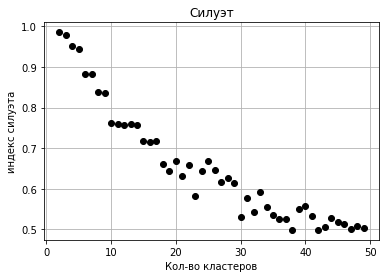

In [94]:
plt.plot(clast_, score_, 'ko')
plt.xlabel('Кол-во кластеров')
plt.ylabel('индекс силуэта')
plt.title('Силуэт')
plt.grid(True)
plt.show()

In [ ]:
data = pd.read_excel('data/D31.csv')
data
X = []
d = []
for i in range(0,len(data['x2'])):
    d.append(data['x1'][i])
    d.append(data['x2'][i])
    X.append(d)
    d = []
X = np.array(X)